## Simulated spectra for a grouped of targets

In [1]:
import numpy as np
import fitsio
import astropy.io
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib import rcParams
%pylab inline

# DESI modules
import desispec.io

Populating the interactive namespace from numpy and matplotlib


In [2]:
froot = '/project/projectdirs/desi/datachallenge/reference_runs/19.2/'
ipix = 5263
spec_path = 'spectro/redux/mini/spectra-64/{:d}/{:d}/'.format(ipix//100, ipix)
f_spec = froot + spec_path + 'spectra-64-{:d}.fits'.format(ipix)

In [3]:
fitsio.FITS(f_spec)


  file: /project/projectdirs/desi/datachallenge/reference_runs/19.2/spectro/redux/mini/spectra-64/52/5263/spectra-64-5263.fits
  mode: READONLY
  extnum hdutype         hduname[v]
  0      IMAGE_HDU       
  1      BINARY_TBL      FIBERMAP
  2      BINARY_TBL      SCORES
  3      IMAGE_HDU       B_WAVELENGTH
  4      IMAGE_HDU       B_FLUX
  5      IMAGE_HDU       B_IVAR
  6      IMAGE_HDU       B_MASK
  7      IMAGE_HDU       B_RESOLUTION
  8      IMAGE_HDU       R_WAVELENGTH
  9      IMAGE_HDU       R_FLUX
  10     IMAGE_HDU       R_IVAR
  11     IMAGE_HDU       R_MASK
  12     IMAGE_HDU       R_RESOLUTION
  13     IMAGE_HDU       Z_WAVELENGTH
  14     IMAGE_HDU       Z_FLUX
  15     IMAGE_HDU       Z_IVAR
  16     IMAGE_HDU       Z_MASK
  17     IMAGE_HDU       Z_RESOLUTION

In [4]:
fm = Table.read(f_spec, 'FIBERMAP')
scores = Table.read(f_spec, 'SCORES')

---

### FIBERMAP

In [5]:
print(fm.colnames)

['TARGETID', 'DESI_TARGET', 'BGS_TARGET', 'MWS_TARGET', 'SECONDARY_TARGET', 'TARGET_RA', 'TARGET_DEC', 'TARGET_RA_IVAR', 'TARGET_DEC_IVAR', 'BRICKID', 'BRICK_OBJID', 'MORPHTYPE', 'PRIORITY', 'SUBPRIORITY', 'REF_ID', 'PMRA', 'PMDEC', 'PMRA_IVAR', 'PMDEC_IVAR', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'FLUX_W1', 'FLUX_W2', 'FLUX_IVAR_G', 'FLUX_IVAR_R', 'FLUX_IVAR_Z', 'FLUX_IVAR_W1', 'FLUX_IVAR_W2', 'FIBERFLUX_G', 'FIBERFLUX_R', 'FIBERFLUX_Z', 'FIBERFLUX_W1', 'FIBERFLUX_W2', 'FIBERTOTFLUX_G', 'FIBERTOTFLUX_R', 'FIBERTOTFLUX_Z', 'FIBERTOTFLUX_W1', 'FIBERTOTFLUX_W2', 'MW_TRANSMISSION_G', 'MW_TRANSMISSION_R', 'MW_TRANSMISSION_Z', 'EBV', 'PHOTSYS', 'FIBER', 'PETAL_LOC', 'DEVICE_LOC', 'LOCATION', 'FIBERSTATUS', 'OBJTYPE', 'LAMBDA_REF', 'DESIGN_X', 'DESIGN_Y', 'DESIGN_Q', 'DESIGN_S', 'NUMTARGET', 'FIBER_RA', 'FIBER_DEC', 'FIBER_RA_IVAR', 'FIBER_DEC_IVAR', 'DELTA_X', 'DELTA_Y', 'DELTA_X_IVAR', 'DELTA_Y_IVAR', 'NUM_ITER', 'SPECTROID', 'BRICKNAME', 'LAMBDAREF', 'NIGHT', 'EXPID', 'TILEID']


In [6]:
print(fm['TARGETID'].shape)
print(len(set(fm['TARGETID'])))

(1762,)
875


In [7]:
set(fm['DESI_TARGET'])

{0,
 2,
 4,
 9,
 17,
 4294967296,
 1152921504606846976,
 2305843009213693952,
 2305843017803628544,
 2305843026393563136,
 2305843052163366912}

In [8]:
s = '{:0>64b}'.format(2305843017803628544)[::-1]
for i, s_ in enumerate(s):
    if s_ == '1': print(i)

33
61


---

### Spectra

In [9]:
specobj = desispec.io.read_spectra(f_spec)

In [10]:
tid = fm['TARGETID'][10]
print(tid)

288230398226336882


In [11]:
specot = specobj.select(targets=[tid])

In [12]:
print('number of targets: ', specot.num_targets())
print('number of spectra: ', specot.num_spectra())

number of targets:  1
number of spectra:  2


In [13]:
bwave = specot.wave['b']
rwave = specot.wave['r']
zwave = specot.wave['z']

bflux = specot.flux['b']
rflux = specot.flux['r']
zflux = specot.flux['z']

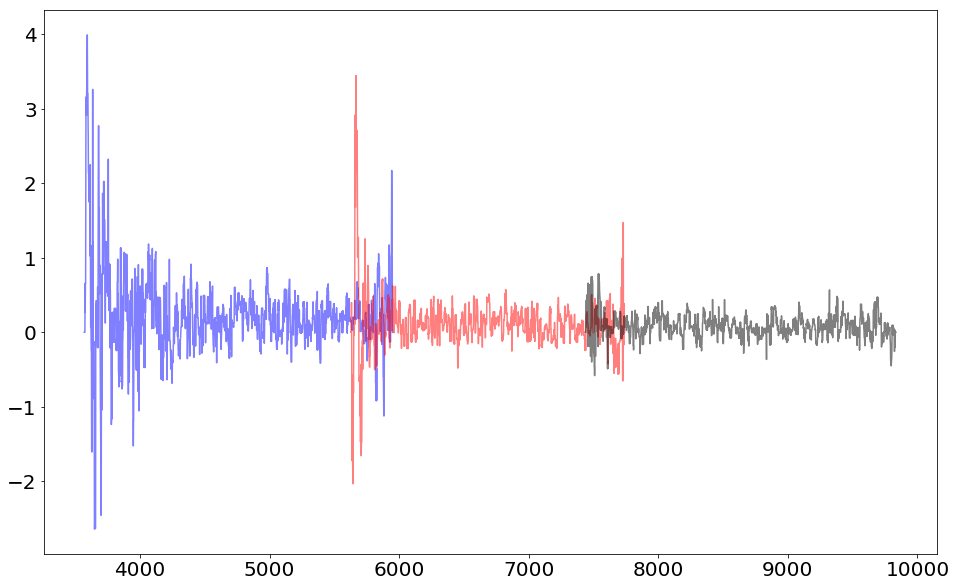

In [14]:
from scipy.signal import medfilt

# plot the spectrum
rcParams['figure.figsize'] = [16, 10]
rcParams['font.size'] = 20
fig, (ax) = plt.subplots(1, 1)

ss = 0
ks = 15 # kernel_size

ax.plot(bwave, medfilt(bflux[ss], ks), 'b', alpha=0.5)
ax.plot(rwave, medfilt(rflux[ss], ks), 'r', alpha=0.5)
ax.plot(zwave, medfilt(zflux[ss], ks), 'k', alpha=0.5)

plt.show()